# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression
* Some re-sampling methods    
    * Train-Test splits
    * Cross Validation

Linear regression is used to model and predict continuous outcomes while logistic regression is used to model binary outcomes. We'll see some examples of linear regression as well as Train-test splits.


The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [2]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%pylab inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


Populating the interactive namespace from numpy and matplotlib


***
# Part 1: Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset $X$ and $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $X_i$ without a $Y$ value.  </li>
  <li> Model the <b>strength of the relationship</b> between each dependent variable $X_i$ and $Y$</li>
    <ul>
      <li> Sometimes not all $X_i$ will have a relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to determine $Y$ </li>
    </ul>
   <li>Linear regression is used in so many applications that I won't warrant this with examples. It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A brief recap (feel free to skip if you don't care about the math)
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is linearly related to the dependent variable $Y$.  

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. This is the simplest form of linear regression (one variable), we'll call this the simple model. 

* $\beta_0$ is the intercept of the linear model

* Multiple linear regression is when you have more than one independent variable
    * $X_1$, $X_2$, $X_3$, $\ldots$

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once you estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, you can use these to predict new values of $Y$

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is one of the most common methods
    * We will discuss least squares today
    
#### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the difference between the following: 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

where $N$ is the number of observations.  

* We will not go into the mathematical details, but the least squares estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ minimize the sum of the squared residuals $r_i = y_i - (\beta_0 + \beta_1 x_i)$ in the model (i.e. makes the difference between the observed $y_i$ and linear model $\beta_0 + \beta_1 x_i$ as small as possible). 

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

**Note**: The "hat" means it is an estimate of the coefficient.  

***
# Part 2: Boston Housing Data Set

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [8]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [9]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [10]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
print(boston.target.shape)

(506,)


In [12]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [13]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatter plots
***

Let's look at some scatter plots for three variables: 'CRIM', 'RM' and 'PTRATIO'. 

What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? 

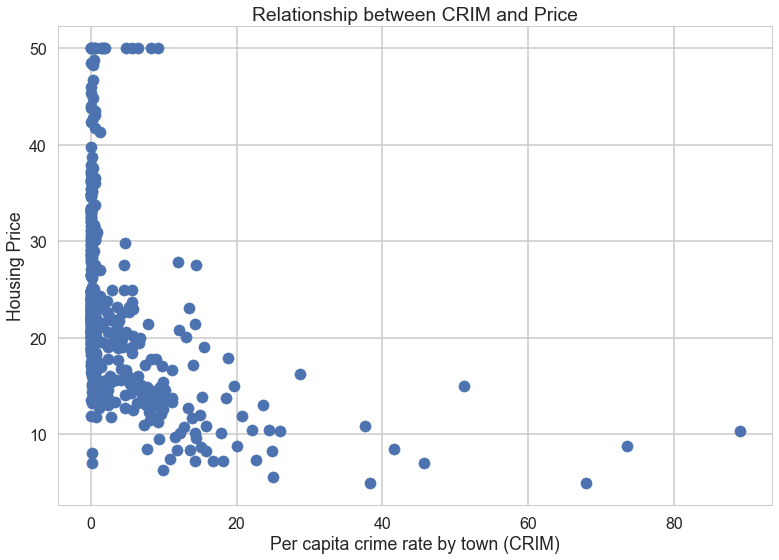

In [14]:
# #scatter plot between *CRIM* and *PRICE*
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

**Relationship:** Crime rate and House prices are negatively corelated. Higher the crime rate lower the house price. Although this is not true for every datapoint. There are houses with lower price when the crime rate is low.

**Your turn**: Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. What do you notice? 

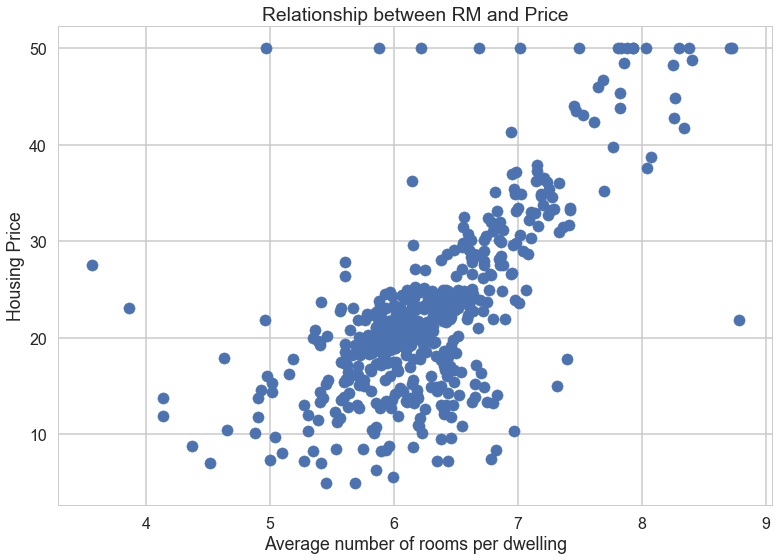

In [15]:
#scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Price')

**Relationship** - There exists a clear indication that Average number of rooms and House price have positive relationship. Houses with more rooms are priced high.

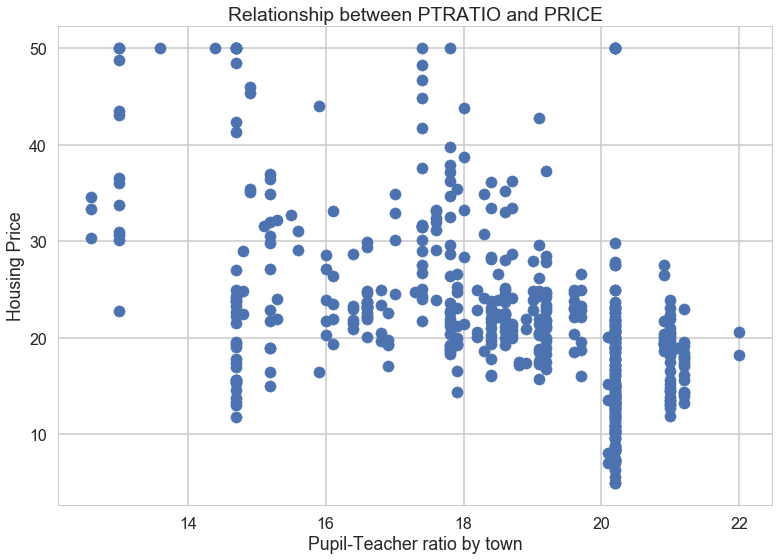

In [16]:
#scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel('Pupil-Teacher ratio by town')
plt.ylabel('Housing Price')
plt.title('Relationship between PTRATIO and PRICE')

**Relationship** - I don't quite see any connection between PTRATIO and PRICE.

**Your turn**: What are some other numeric variables of interest? Plot scatter plots with these variables and *PRICE*.

I'm curious to know the relationship between PRICE and CHAS, DIS, RAD, TAX, B

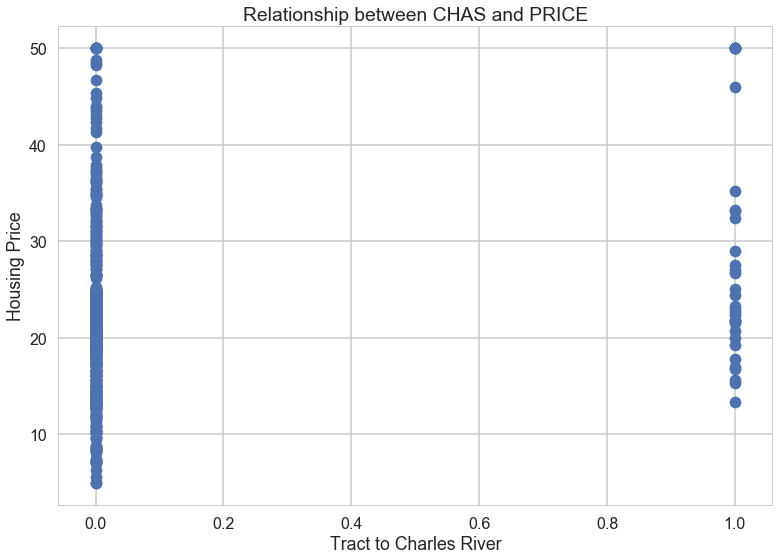

In [17]:
#scatter plot between *CHAS* and *PRICE*
plt.scatter(bos.CHAS, bos.PRICE)
plt.xlabel('Tract to Charles River')
plt.ylabel('Housing Price')
plt.title('Relationship between CHAS and PRICE')

- 0 - tract doesn't bound river
- 1 - tract bounds river

**Relationship** - Most of the houses are closer to the river, but there seems to be no relationship bewteen House price and Charles river. Whether the house is closer to the river or not the prices are ranging from low to high.

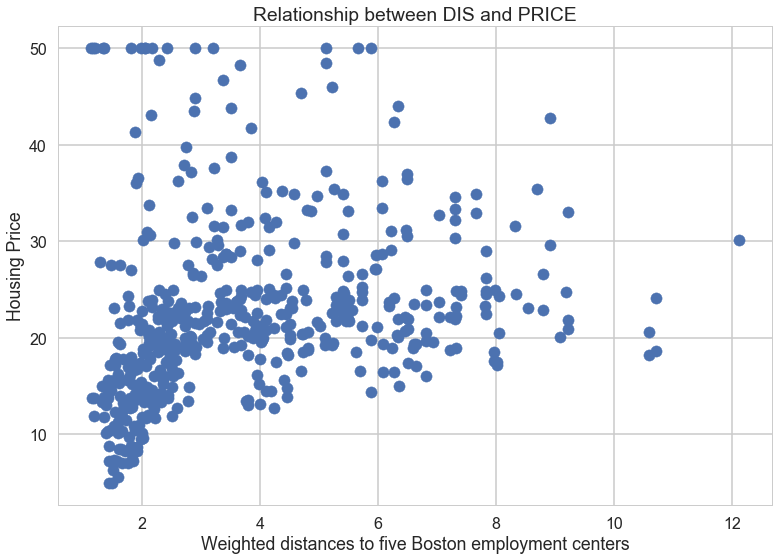

In [18]:
#scatter plot between *DIS* and *PRICE*
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel('Weighted distances to five Boston employment centers')
plt.ylabel('Housing Price')
plt.title('Relationship between DIS and PRICE')

**Relationship:**
Weighted distance and house prices have **linear correlation**. An increase in the weighted distance will result in increase in house prices. 

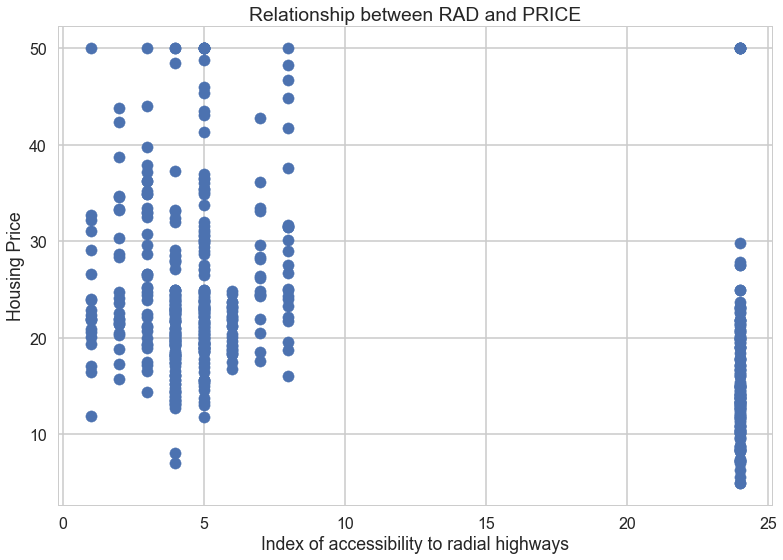

In [19]:
#scatter plot between *RAD* and *PRICE*
plt.scatter(bos.RAD, bos.PRICE)
plt.xlabel('Index of accessibility to radial highways')
plt.ylabel('Housing Price')
plt.title('Relationship between RAD and PRICE')

I don't see any relationship between RAD and House price. Since most of the data points are between 0-10 (Index of accessibility to radial highways) we can infer that people prefer houses that are closer to highways.

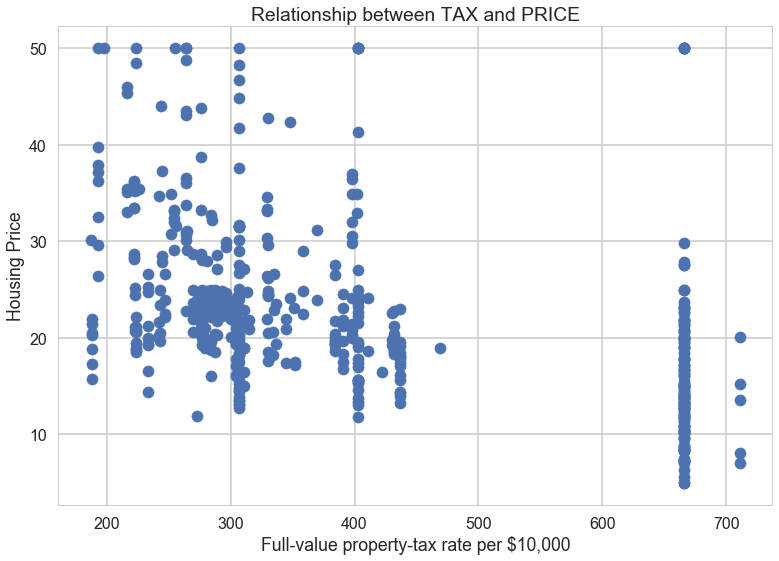

In [20]:
#scatter plot between *TAX* and *PRICE*
plt.scatter(bos.TAX, bos.PRICE)
plt.xlabel('Full-value property-tax rate per $10,000')
plt.ylabel('Housing Price')
plt.title('Relationship between TAX and PRICE')

As we can see there is no significant relationship between TAX and PRICE. Seems like most of the house owners pay around USD200 to USD450 property tax, there are a few house owners who pay a $700 bucks.

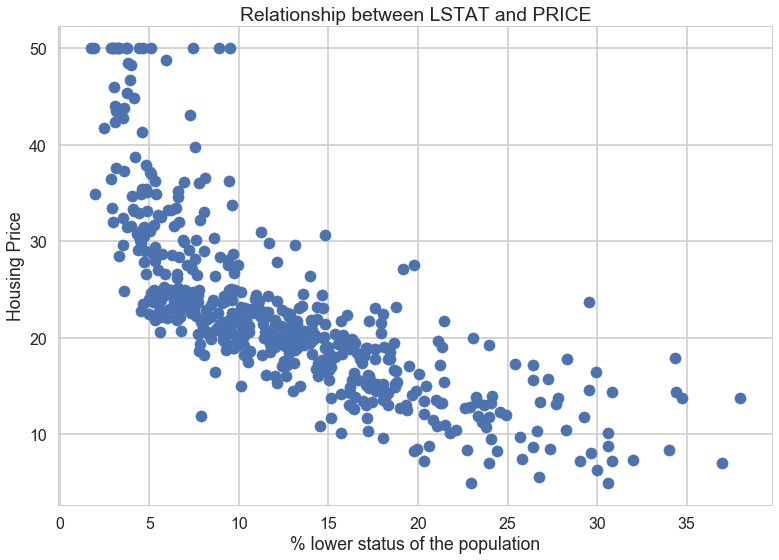

In [21]:
#scatter plot between *LSTAT* and *PRICE*
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel('% lower status of the population')
plt.ylabel('Housing Price')
plt.title('Relationship between LSTAT and PRICE')

It's quite natural that lower financial status population own houses priced low. We can see from the graph above that as the status increases the house price increases too. Lower status of population and House prices are positively correlated.

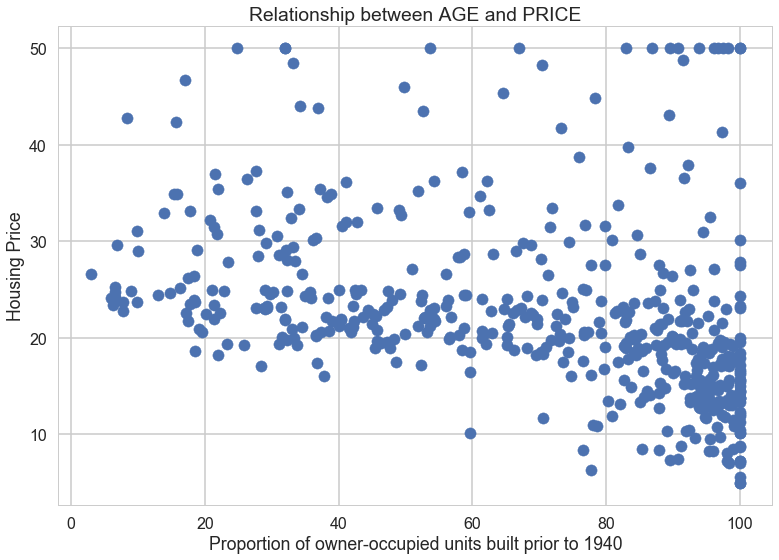

In [22]:
#scatter plot between *AGE* and *PRICE*
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel('Proportion of owner-occupied units built prior to 1940')
plt.ylabel('Housing Price')
plt.title('Relationship between AGE and PRICE')

**Relationship** - Age and House price have negative relationship between them. Only a few houses which are built prior to 1940 and owened by the owners are high valued, most of the old houses occupied by the owners are low priced. 

### Scatter Plots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

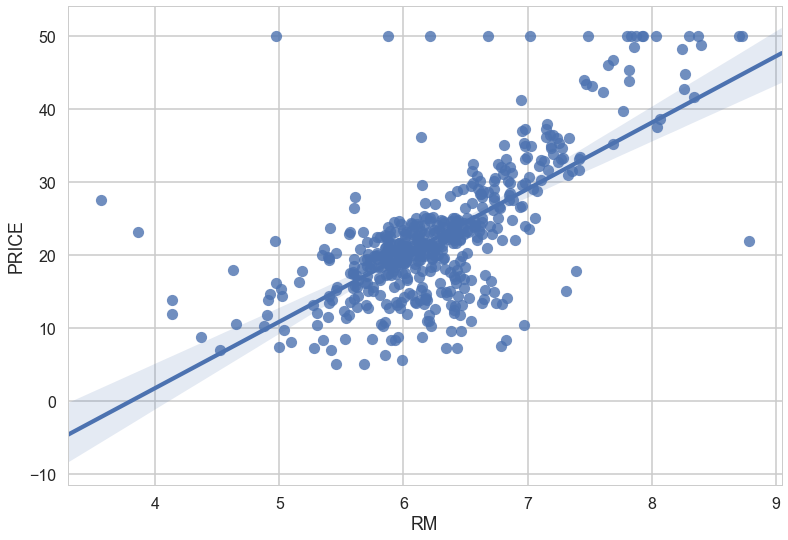

In [23]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


Histograms are a useful way to visually summarize the statistical properties of numeric variables. They can give you an idea of the mean and the spread of the variables as well as outliers.

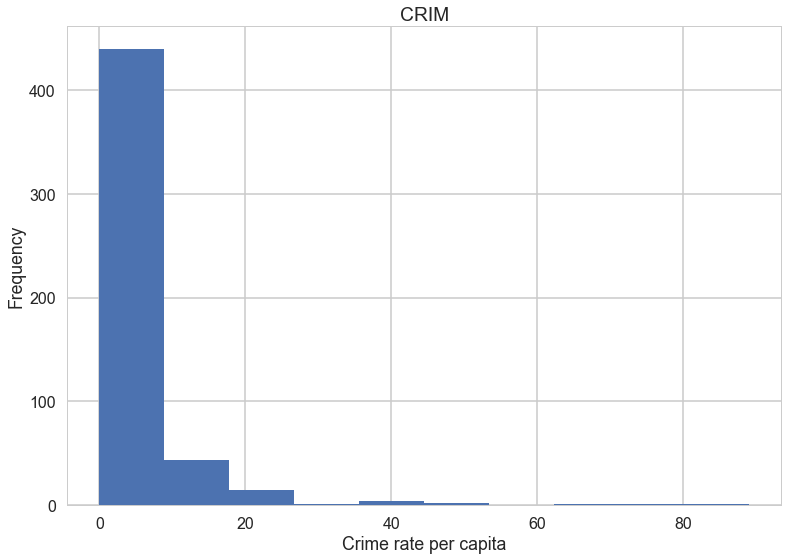

In [24]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

There is 0-10% percent of crime in that area.

**Your turn**: Plot separate histograms and one for *RM*, one for *PTRATIO*. Any interesting observations?

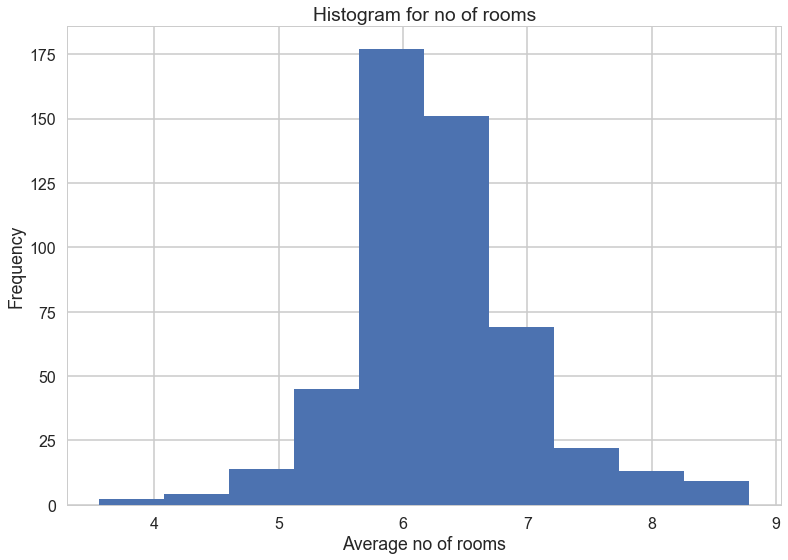

In [25]:
# Histogram for Average no of rooms (RM)
plt.hist(bos.RM)
plt.title('Histogram for no of rooms')
plt.xlabel('Average no of rooms')
plt.ylabel('Frequency')
plt.show()

Most of the houses have atleast six rooms 

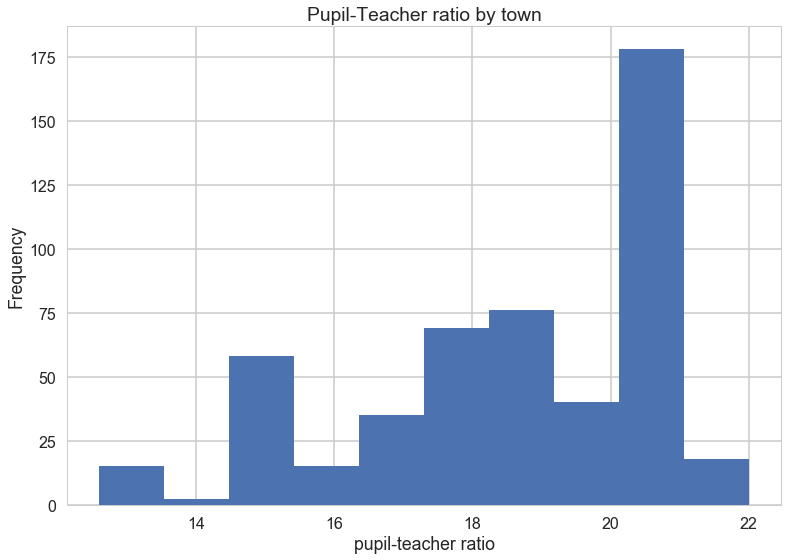

In [26]:
plt.hist(bos.PTRATIO)
plt.title('Pupil-Teacher ratio by town')
plt.xlabel('pupil-teacher ratio')
plt.ylabel('Frequency')
plt.show()

## Linear regression with  Boston housing data example
***

Here, 

$Y$ = boston housing prices (also called "target" data in python)

and

$X$ = all the other features (or independent variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least squares method as the way to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive, it's a good library to have in your toolbox. Here's a quick example of what you could do with it.

In [27]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\nikhi_000\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [28]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 10 Dec 2017   Prob (F-statistic):           2.49e-74
Time:                        19:18:10   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. We can interpret the coefficient as, if we compare two groups of towns, one where the average number of rooms is say $5$ and the other group is the same except that they all have $6$ rooms. For these two groups the average difference in house prices is about $9.1$ (in thousands) so about $\$9,100$ difference. The confidence interval gives us a range of plausible values for this difference, about ($\$8,279, \$9,925$), deffinitely not chump change. 

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is done like this:

`Outcome ~ X1 + X2 + X3`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex, for a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

**Your turn:** Create a scatterpot between the predicted prices, available in `m.fittedvalues` and the original prices. How does the plot look?

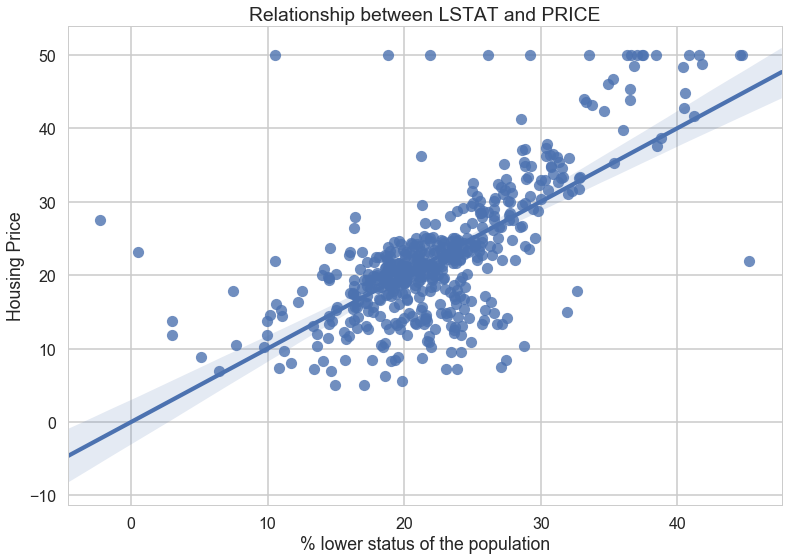

In [29]:
# your turn
# scatterpot between the predicted prices and the original prices
sns.regplot(y='PRICE', x=m.fittedvalues, data=bos, fit_reg=True)
plt.xlabel('% lower status of the population')
plt.ylabel('Housing Price')
plt.title('Relationship between LSTAT and PRICE')

### Fitting Linear Regression using `sklearn`


In [30]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [31]:
# Look inside lm object
# lm.<tab>
# Estimated coefficients and intercept
#print(lm.)
#print(lm.fit_intercept)

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [32]:
# Use all 13 predictors to fit linear regression model
lm.fit_intercept=False
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

**Your turn:** How would you change the model to not fit an intercept term? Would you recommend not having an intercept?


I would strongly recommend **not to omit the intercept.** An intercept is an estimate of dependent variable when all the independent variables are set to zero. Practically this is not possible, in most of the cases there is no statistical significance to intercept. That being said it is very important to have an intercept because **it makes sure the model is not biased and produces meaningful $R^2$.** 

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `lm.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [33]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 0.0


In [34]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


In [35]:
# Features and thier respective coefficients
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.091630
1,ZN,0.048675
2,INDUS,-0.003779
3,CHAS,2.856368
4,NOX,-2.880779
5,RM,5.925214
6,AGE,-0.007224
7,DIS,-0.967995
8,RAD,0.170443
9,TAX,-0.009389


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [36]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 29.10255504,  24.50656965,  31.2317794 ,  29.71046643,  29.56672407])

**Your turn:** 

* Histogram: Plot a histogram of all the predicted prices
* Scatter Plot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).

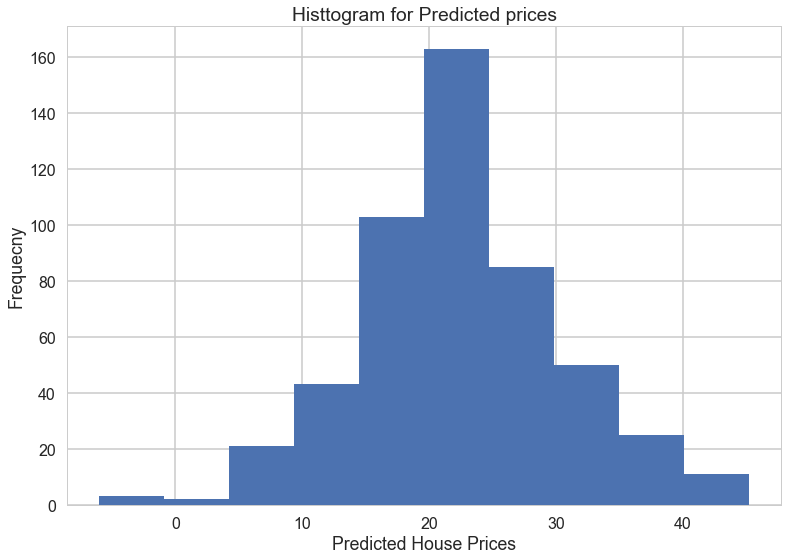

In [37]:
# your turn
# Histogram: Plot a histogram of all the predicted prices
plt.hist(x=lm.predict(X))
plt.xlabel('Predicted House Prices')
plt.ylabel('Frequecny')
plt.title('Histtogram for Predicted prices')

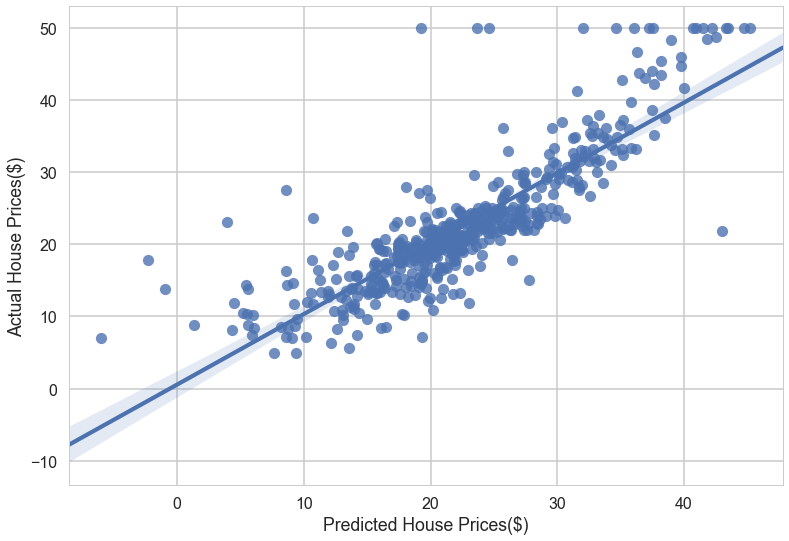

In [38]:
# Scatter Plot between true prices and predicted prices 
scatter = sns.regplot(y='PRICE', x=lm.predict(X), data=bos,fit_reg=True)
scatter.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)')

### Residual sum of squares

Let's calculate the residual sum of squares 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

In [39]:
S = np.sum((bos.PRICE - lm.predict(X)) ** 2)
S

12231.217345703373

#### Mean squared error
***
This is simple the mean of the residual sum of squares.

**Your turn:** Calculate the mean squared error and print it.

$$    MSE = 1/N \sum_{i=1}^N (y_i - f(x_i))^2          $$     
$$           = 1/N \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

In [40]:
# MSE calculation
MSE = np.mean((bos.PRICE - lm.predict(X))**2)
MSE

24.17236629585647

## Relationship between `PTRATIO` and housing price
***

Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town)

Calculate the mean squared error. 


In [41]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
msePTRATIO

62.65220001376927

We can also plot the fitted linear regression line. 

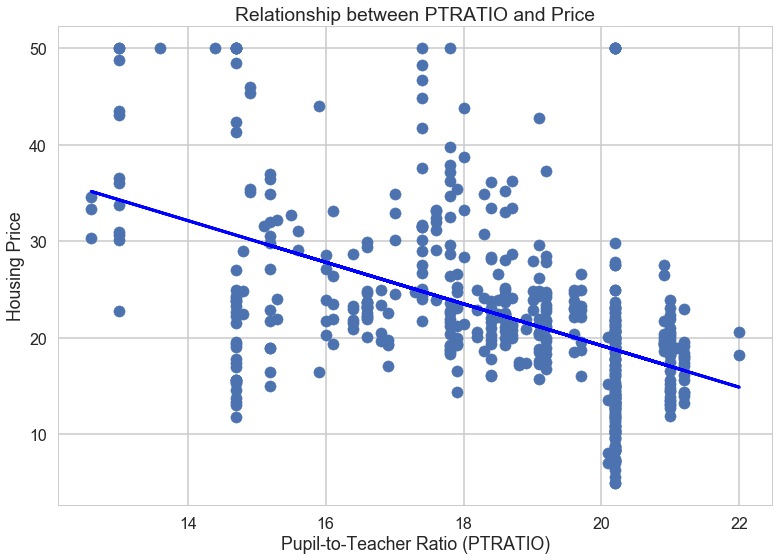

In [43]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.plot(bos.PTRATIO, lm.predict(X[['PTRATIO']]), color='blue', linewidth=3)
plt.show()

# Your turn
***

Try fitting a linear regression model using three independent variables

1. 'CRIM' (per capita crime rate by town)
2. 'RM' (average number of rooms per dwelling)
3. 'PTRATIO' (pupil-teacher ratio by town)

Calculate the mean squared error. 

In [44]:
# Fitting linear regression model using 'CRIM','RM' and 'PTRATIO'
lm = LinearRegression()
lm.fit(X[['CRIM','RM','PTRATIO']], bos.PRICE)
MSE_comb = np.mean((bos.PRICE - lm.predict(X[['CRIM','RM','PTRATIO']])) ** 2)
MSE_comb

34.32379656468118


## Other important things to think about when fitting a linear regression model
***
<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. </li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X.  
        <ul>
            <li>e.g. PTRATIO
        </ul>
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. 
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>


# Part 3: Training and Test Data sets

### Purpose of splitting data into Training/testing sets
***
<div class="span5 alert alert-info">

<p> Let's stick to the linear regression example: </p>
<ul>
  <li> We built our model with the requirement that the model fit the data well. </li>
  <li> As a side-effect, the model will fit <b>THIS</b> dataset well. What about new data? </li>
    <ul>
      <li> We wanted the model for predictions, right?</li>
    </ul>
  <li> One simple solution, leave out some data (for <b>testing</b>) and <b>train</b> the model on the rest </li>
  <li> This also leads directly to the idea of cross-validation, next section. </li>  
</ul>
</div>

***

One way of doing this is you can create training and testing data sets manually. 

In [45]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = bos.PRICE[:-50]
Y_test = bos.PRICE[-50:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(456, 13)
(50, 13)
(456,)
(50,)


Another way, is to split the data into random train and test subsets using the function `train_test_split` in `sklearn.cross_validation`. Here's the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html).

In [46]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, bos.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


**Your turn:**  Let's build a linear regression model using our new training data sets. 

* Fit a linear regression model to the training set
* Predict the output on the test set

There are definitely a few outliers in the graph below. All the house prices that are near '50' are not explained by the model.
But overall the model seems to be a decent fit for the data as the regression line is not deviating from the data points.

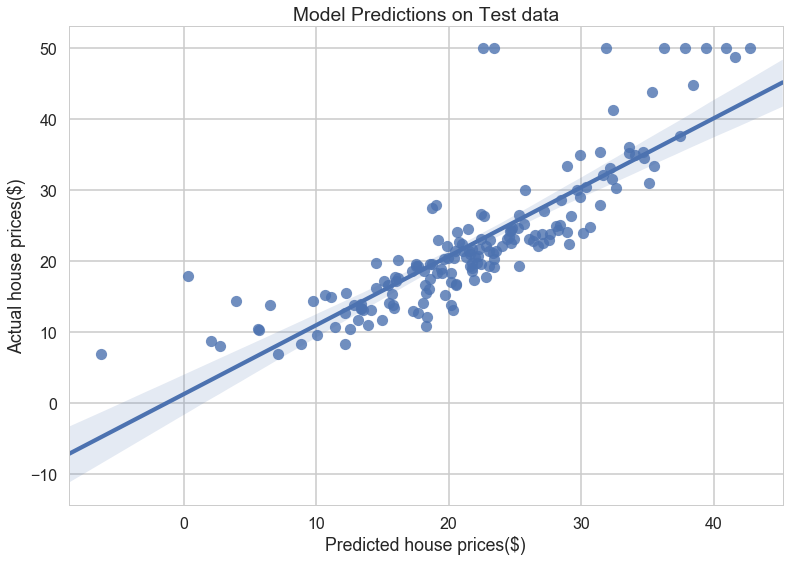

In [47]:
# Linear regression model on the training set
lm = LinearRegression()
lm.fit(X_train, Y_train)
# Output prediction on test set
g = sns.regplot(y=Y_test,x=lm.predict(X_test),fit_reg=True)
g.set(xlabel='Predicted house prices($)',ylabel='Actual house prices($)',title='Model Predictions on Test data')

**Your turn:**

Calculate the mean squared error 

* using just the test data
* using just the training data

Are they pretty similar or very different? What does that mean?

In [48]:
# Mean squared error on Test and Training data
MSE_test = np.mean((Y_test - lm.predict(X_test)) ** 2)
MSE_train = np.mean((Y_train - lm.predict(X_train)) ** 2)
MSE_test, MSE_train

(28.541367275619013, 19.54675847353466)

MSE_train = 19.546 is much lesser than MSE_test = 28.541. The Test MSE being larger than Train MSE might occur due to overfitting the data in training data set. 

**Overfitting** - occurs when the model learns too much out of the training data and thus learning patterns that are just caused by random chance in the training data and might not be found in test data set.

Let us look at the residual plot before answering this question.

As we can see in the plot below, most of the data is distributed 10 units away form the **reference line**. So we can conclude that every house might have a $10 price diffrence between the predicted and original, which is not a huge difference. 

**Therefore we can conclude that eventhough the Test MSE is larger than Train MSE, by looking at the residual plot and the distribution of test and train data this is not the case of Overfitting**.

#### Residual plots

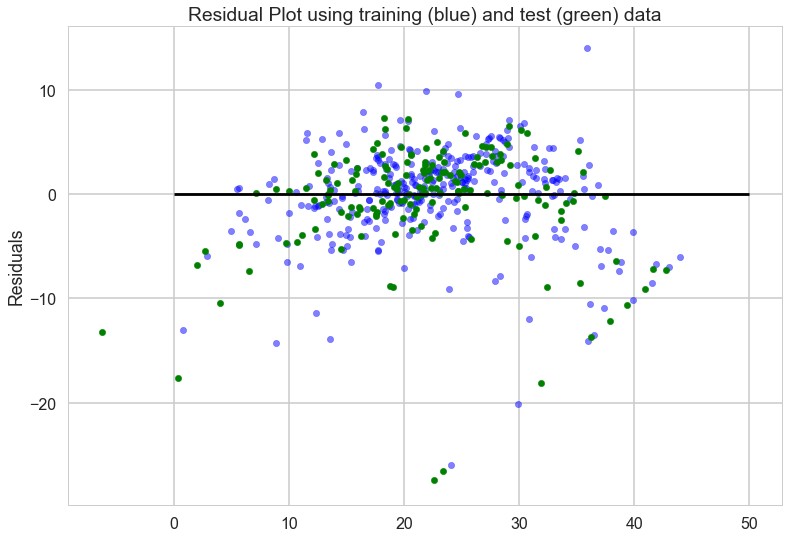

In [49]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

**Your turn:** Do you think this linear regression model generalizes well on the test data?

Ideally in a residual plot the train and test data are symmetrically distributed, tending to cluster towards the middle of the 'reference line' and they do not have any pattren.

There seems to be simililarity in the distribution of train and test data. Hence we can deduce that the model generalizes test data too.

### K-fold Cross-validation as an extension of this idea
***
<div class="span5 alert alert-info">

<p> A simple extension of the Test/train split is called K-fold cross-validation.  </p>

<p> Here's the procedure:</p>
<ul>
  <li> randomly assign your $n$ samples to one of $K$ groups. They'll each have about $n/k$ samples</li>
  <li> For each group $k$: </li>
    <ul>
      <li> Fit the model (e.g. run regression) on all data excluding the $k^{th}$ group</li>
      <li> Use the model to predict the outcomes in group $k$</li>
      <li> Calculate your prediction error for each observation in $k^{th}$ group (e.g. $(Y_i - \hat{Y}_i)^2$ for regression, $\mathbb{1}(Y_i = \hat{Y}_i)$ for logistic regression). </li>
    </ul>
  <li> Calculate the average prediction error across all samples $Err_{CV} = \frac{1}{n}\sum_{i=1}^n (Y_i - \hat{Y}_i)^2$ </li>
</ul>
</div>

***

Luckily you don't have to do this entire process all by hand (``for`` loops, etc.) every single time, ``sci-kit learn`` has a very nice implementation of this, have a look at the [documentation](http://scikit-learn.org/stable/modules/cross_validation.html).

**Your turn (extra credit):** Implement K-Fold cross-validation using the procedure above and Boston Housing data set using $K=4$. How does the average prediction error compare to the train-test split above?

In [50]:
# import required libraries
from sklearn.model_selection import KFold
y = bos.PRICE
# k=4 implies 4 splits on training data
kf = KFold(n_splits=4)
# Define the train and test groups and run Regression on them
for train, test in kf.split(X):
    x_train, x_test, y_train, y_test = X.iloc[train], X.iloc[test], y[train], y[test]
    lm = LinearRegression()
    lm.fit(x_train, y_train)
    # Calculating the Prediction Errors
    # Residual sum of squres
    S = []
    S.append(np.sum(y_train - lm.predict(x_train))**2)
    # Mean squared error
    MSE_trains = []
    MSE_tests = []
    MSE_trains.append(np.mean(y_train - lm.predict(x_train))**2)
    MSE_tests.append(np.mean(y_test - lm.predict(x_test))**2)
    print(S, end='')
    #print(MSE_train, end='')
    #print(MSE_test, end='')

[1.0578340749087889e-24][1.1271560158159905e-25][8.621962548696159e-24][7.052495378766368e-24]

In [51]:
print(MSE_trains)

[4.883999569782803e-29]


In [52]:
print(MSE_test,end='')

28.541367275619013

**Cross_val_score**

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X, bos.PRICE, cv=4, scoring= 'neg_mean_squared_error')
scores

array([-11.69977729, -39.0720141 , -57.59307099, -61.59301573])